<a href="https://colab.research.google.com/github/marcosjsh/FIAP_IA/blob/main/machine_learning_desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
import pandas as pd

In [152]:
dataset = pd.read_csv("insurance.csv")
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [153]:
import numpy as np
import os

np.random.seed(42)

In [154]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [155]:
dataset.shape

(1338, 7)

In [156]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [157]:
set(dataset["sex"])

{'female', 'male'}

In [158]:
dataset["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [159]:
set(dataset["smoker"])

{'no', 'yes'}

In [160]:
dataset["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [161]:
set(dataset["region"])

{'northeast', 'northwest', 'southeast', 'southwest'}

In [162]:
dataset["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [163]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

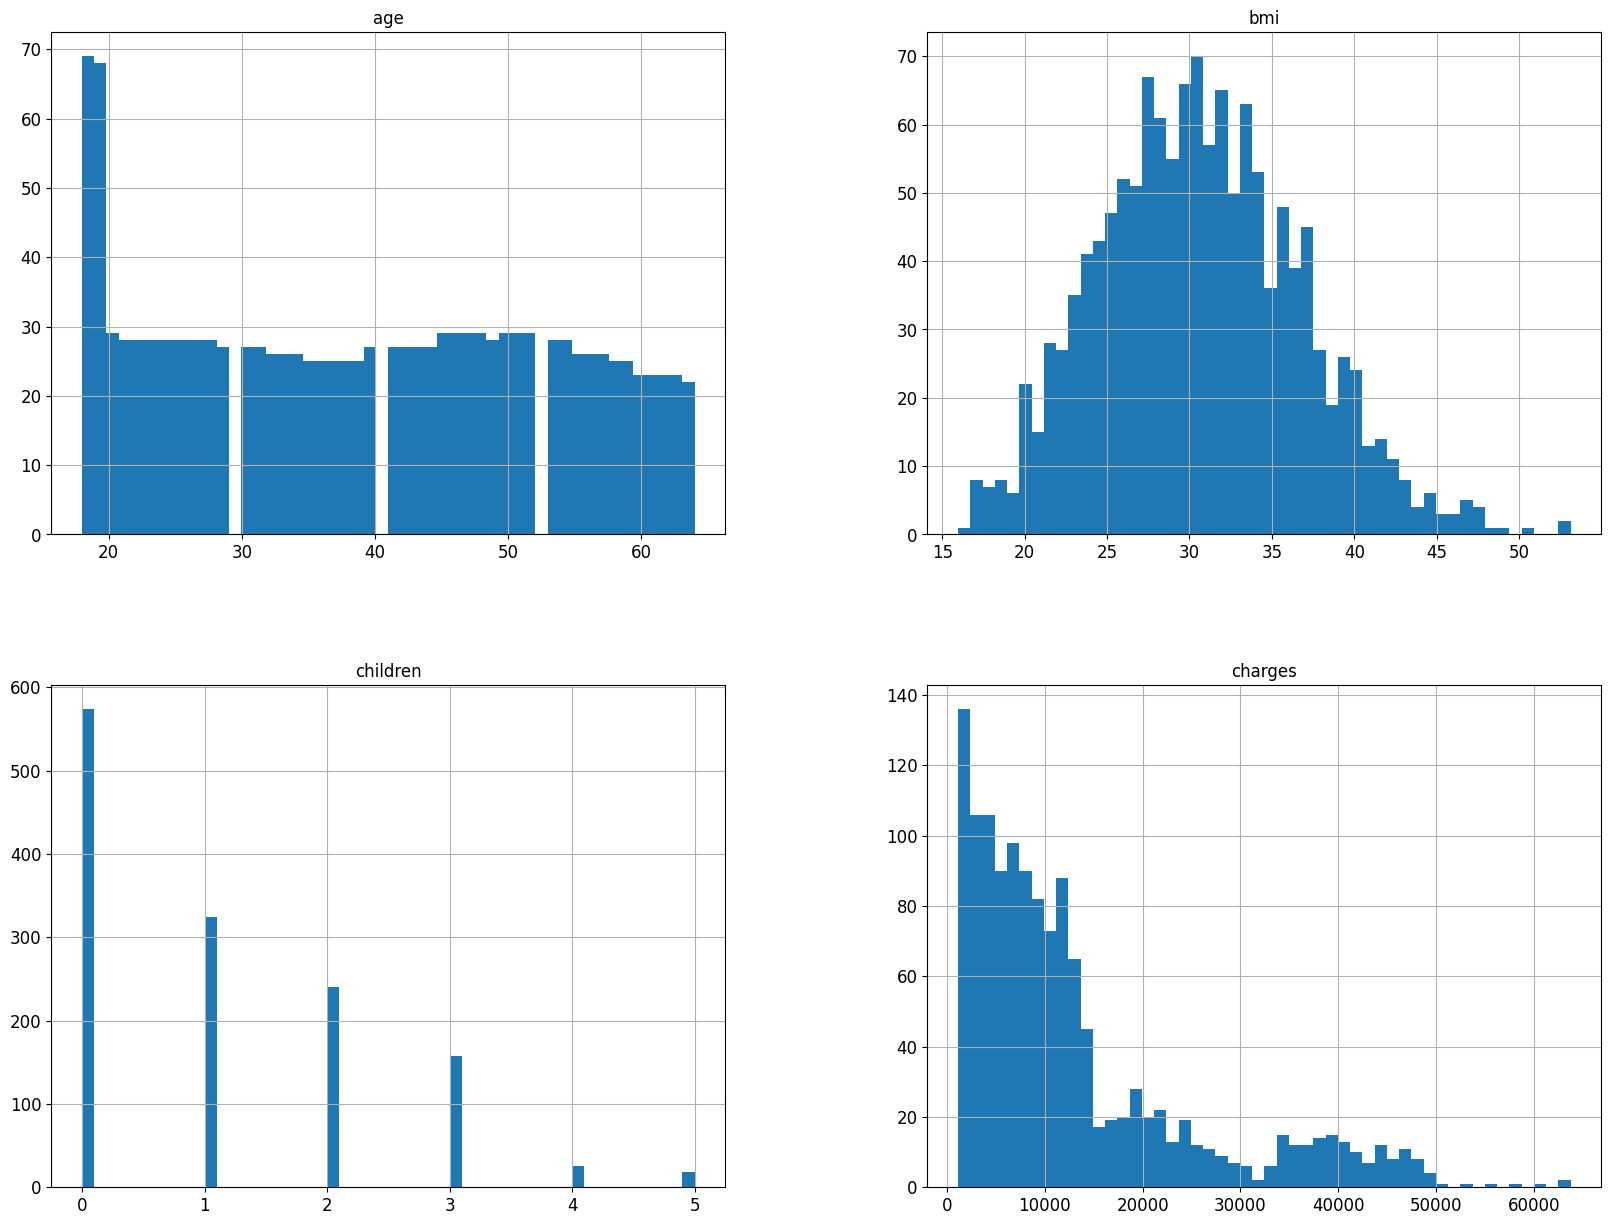

In [164]:
dataset.hist(bins=50, figsize=(20,15))

In [165]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(dataset, test_size=0.2, random_state=7)

In [166]:
print(len(df_train), "Treinamento +", len(df_test), "Teste")

1070 Treinamento + 268 Teste


<Axes: >

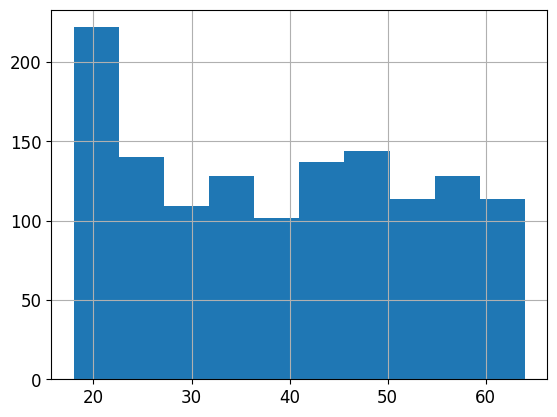

In [167]:
dataset["age"].hist()

In [168]:
dataset["age_cat"] = np.ceil(dataset["age"] / 10)
dataset["age_cat"].where(dataset["age_cat"] < 60, 60.0, inplace=True)

In [169]:
dataset["age_cat"] = pd.cut(dataset["age"],
                            bins=[10.0, 20.0, 30.0, 40.0, 50.0, 60.0, np.inf],
                            labels=[10, 20, 30, 40, 50, 60])

In [170]:
dataset["age_cat"].value_counts()

age_cat
40    281
20    278
50    265
30    257
10    166
60     91
Name: count, dtype: int64

<Axes: >

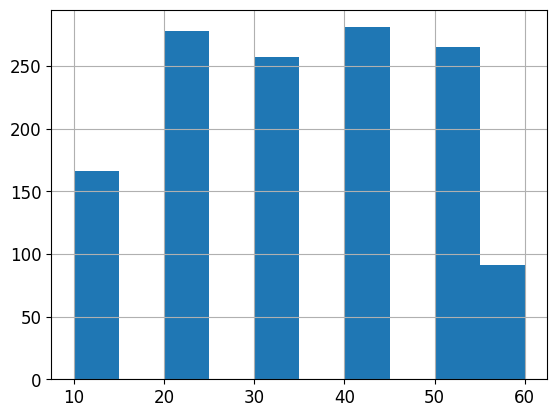

In [171]:
dataset["age_cat"].hist()

In [172]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(dataset, dataset["age_cat"]):
  strat_train_set = dataset.loc[train_index]
  strat_test_set = dataset.loc[test_index]

In [173]:
strat_test_set["age_cat"].value_counts() / len(strat_test_set)

age_cat
20    0.208955
40    0.208955
50    0.197761
30    0.194030
10    0.123134
60    0.067164
Name: count, dtype: float64

In [174]:
strat_train_set["age_cat"].value_counts() / len(strat_train_set)

age_cat
40    0.210280
20    0.207477
50    0.198131
30    0.191589
10    0.124299
60    0.068224
Name: count, dtype: float64

In [175]:
dataset["age_cat"].value_counts() / len(dataset)

age_cat
40    0.210015
20    0.207773
50    0.198057
30    0.192078
10    0.124066
60    0.068012
Name: count, dtype: float64

In [176]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("age_cat", axis=1, inplace=True)

In [177]:
distributions = strat_train_set.copy()

<Axes: xlabel='age', ylabel='charges'>

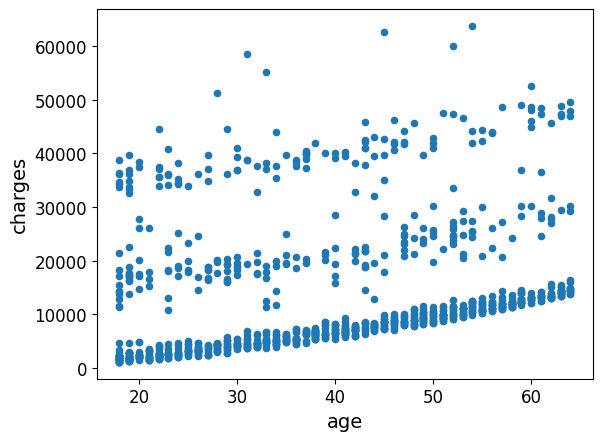

In [178]:
distributions.plot(kind="scatter", x="age", y="charges")

<Axes: xlabel='age', ylabel='charges'>

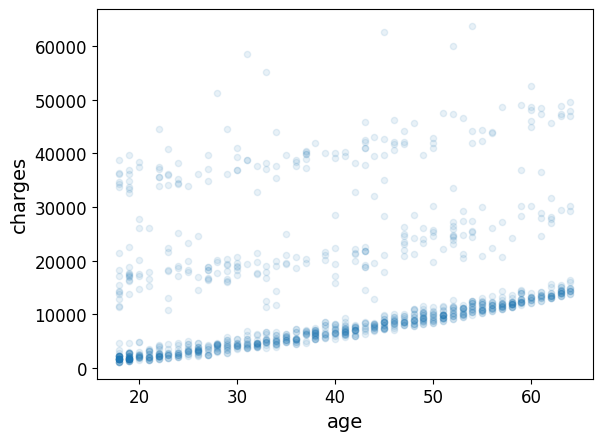

In [179]:
distributions.plot(kind="scatter", x="age", y="charges", alpha=0.1)

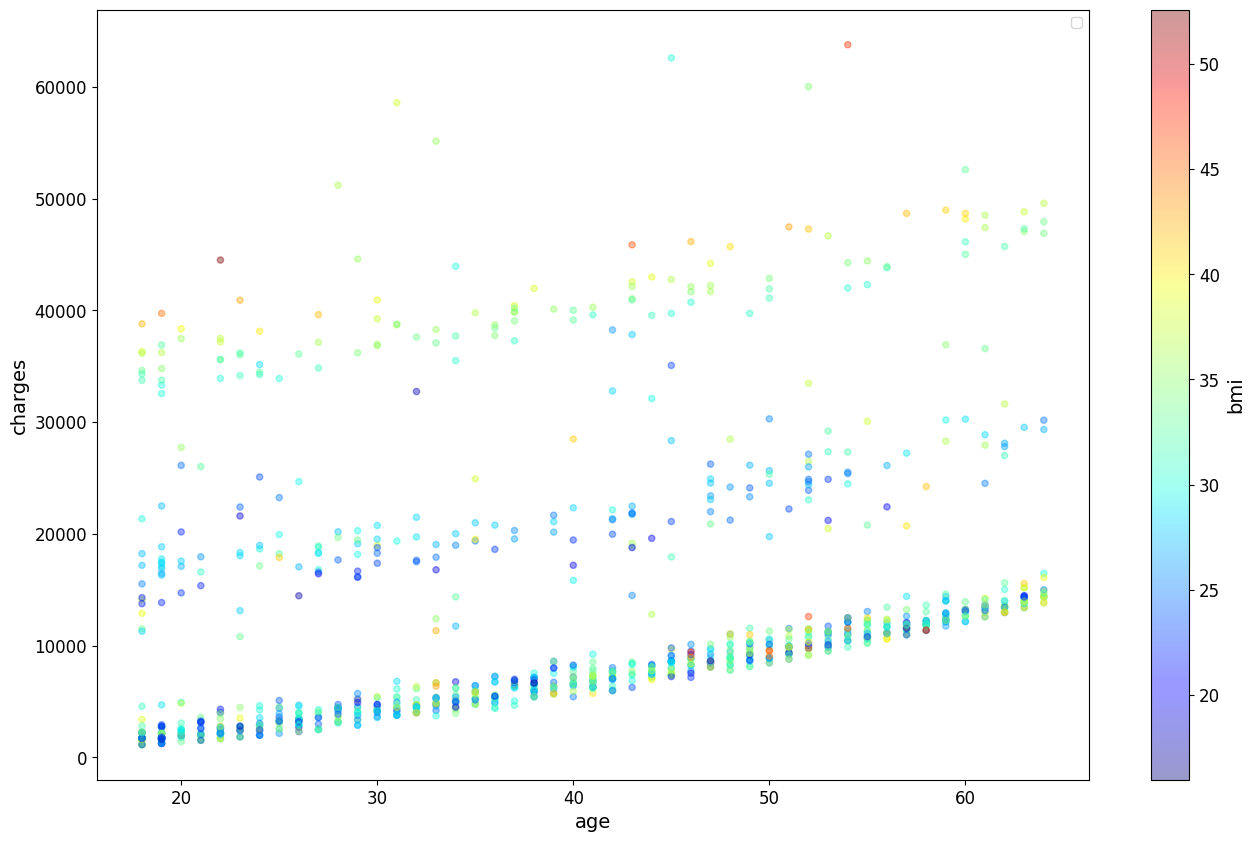

In [192]:
distributions.plot(
    kind="scatter",
    x="age",
    y="charges",
    alpha=0.4,
    figsize=(16,10),
    c="bmi",
    cmap=plt.get_cmap("jet"),
    colorbar=True,
    sharex=False)

plt.legend()


In [205]:
# convertemos os campos de sex e smoker para valores binários
dataset['is_female'] = dataset["sex"].apply(lambda x: 1 if x == "female" else 0)
dataset['is_smoker'] = dataset["smoker"].apply(lambda x: 1 if x == "yes" else 0)

In [206]:
numeric_dataset = dataset.select_dtypes(include=[float, int])

In [207]:
corr_matrix = numeric_dataset.corr()
print(corr_matrix)

                age       bmi  children   charges  is_female  is_smoker
age        1.000000  0.109272  0.042469  0.299008   0.020856  -0.025019
bmi        0.109272  1.000000  0.012759  0.198341  -0.046371   0.003750
children   0.042469  0.012759  1.000000  0.067998  -0.017163   0.007673
charges    0.299008  0.198341  0.067998  1.000000  -0.057292   0.787251
is_female  0.020856 -0.046371 -0.017163 -0.057292   1.000000  -0.076185
is_smoker -0.025019  0.003750  0.007673  0.787251  -0.076185   1.000000


array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='bmi', ylabel='age'>,
        <Axes: xlabel='charges', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='bmi'>,
        <Axes: xlabel='bmi', ylabel='bmi'>,
        <Axes: xlabel='charges', ylabel='bmi'>],
       [<Axes: xlabel='age', ylabel='charges'>,
        <Axes: xlabel='bmi', ylabel='charges'>,
        <Axes: xlabel='charges', ylabel='charges'>]], dtype=object)

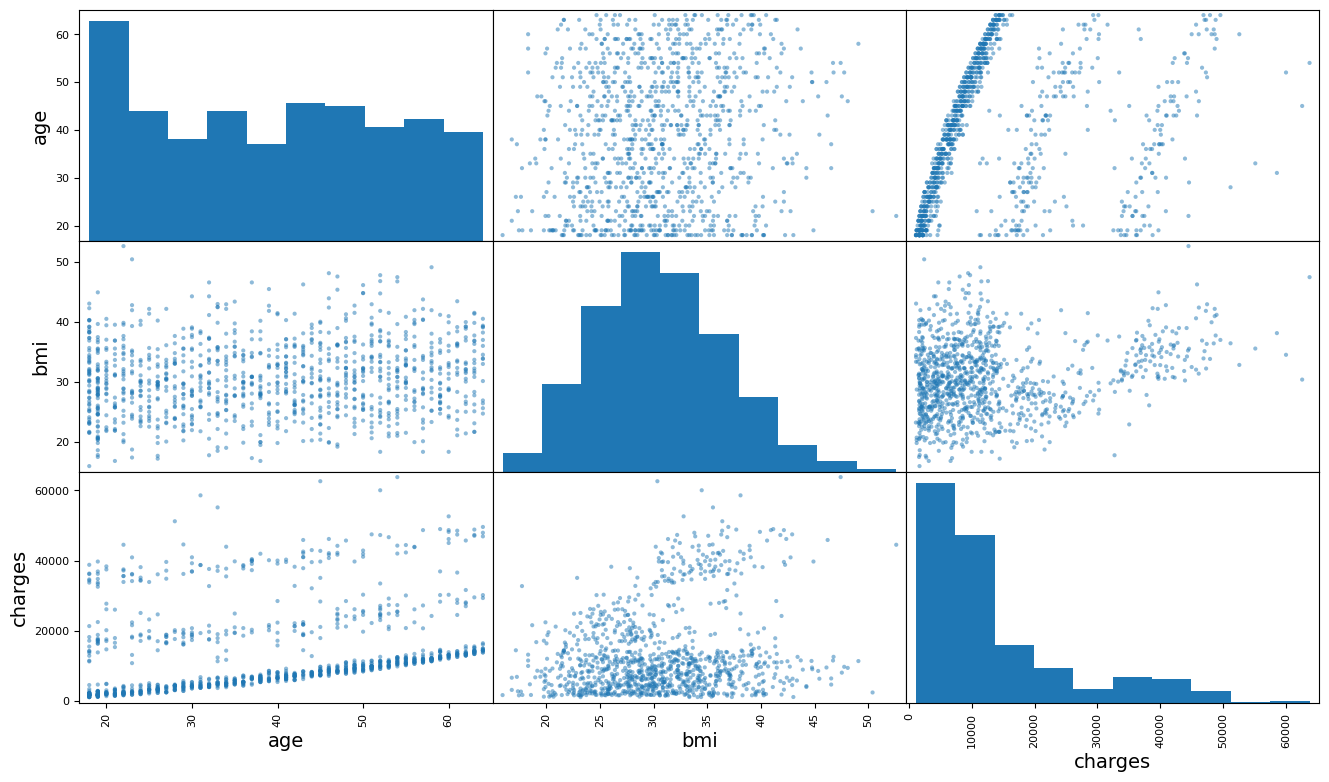

In [208]:
from pandas.plotting import scatter_matrix

attributes = ["age", "bmi", "charges"]
scatter_matrix(distributions[attributes], figsize=(16,9))

(0.0, 60.0, 0.0, 60000.0)

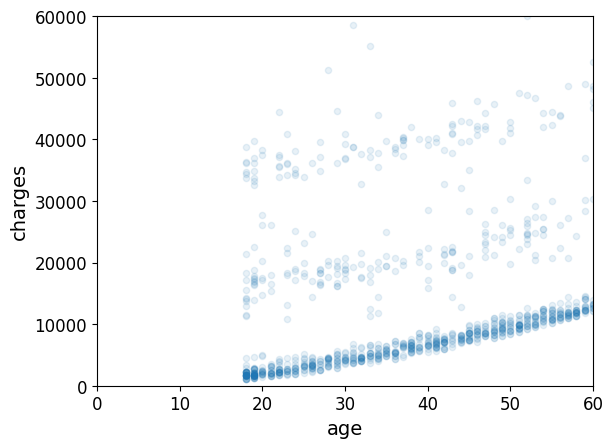

In [209]:
distributions.plot(kind="scatter", x="age", y="charges", alpha=0.1)
plt.axis([0,60,0,60000])

(0.0, 50.0, 0.0, 60000.0)

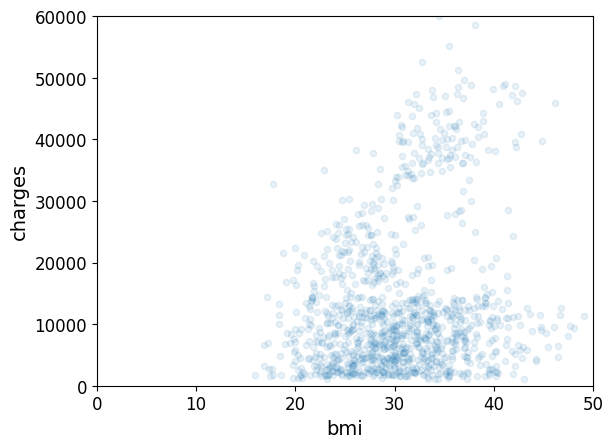

In [210]:
distributions.plot(kind="scatter", x="bmi", y="charges", alpha=0.1)
plt.axis([0,50,0,60000])

(0.0, 1.0, 0.0, 60000.0)

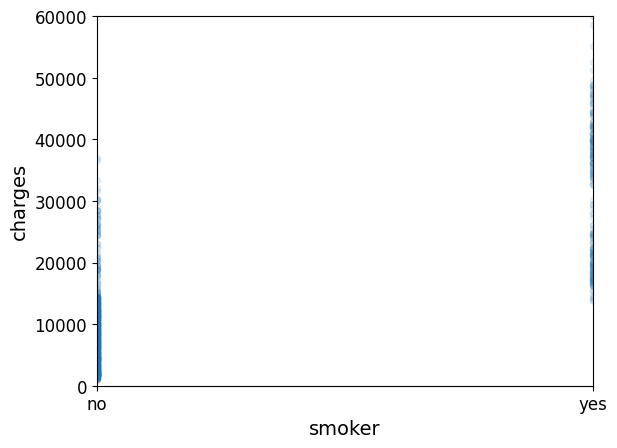

In [211]:
distributions.plot(kind="scatter", x="smoker", y="charges", alpha=0.1)
plt.axis([0,1,0,60000])

In [213]:
#Preparando os dados para colocar no algoritmo
distributions = strat_train_set.drop("charges", axis=1)
distribution_labels = strat_train_set["charges"].copy()

In [214]:
# Verificamos se há colunas nulas
sample_null_rows = distributions[distributions.isnull().any(axis=1)].head()
sample_null_rows

,age,sex,bmi,children,smoker,region


In [203]:
distributions.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [219]:
# removemos o atributo de texto porque a mediana só poderá ser calculada em atributos numéricos
distributions_num = distributions.drop("region", axis=1)


# distributions_num['is_female'] = dataset["sex"].apply(lambda x: 1 if x == "female" else 0)
# distributions_num['is_smoker'] = dataset["smoker"].apply(lambda x: 1 if x == "yes" else 0)

distributions_num = distributions_num.drop("sex", axis=1)
distributions_num = distributions_num.drop("smoker", axis=1)

distributions_num

,age,bmi,children
75,57,34.010,0
269,49,25.840,1
461,42,30.000,0
443,59,36.520,1
557,34,34.210,0
...,...,...,...
531,62,31.730,0
1068,63,21.660,1
604,19,28.310,0
1018,54,35.815,3


In [220]:
try:
    from sklearn.impute import SimpleImputer
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="median")

In [221]:
imputer.fit(distributions_num)

SimpleImputer(strategy='median')

In [222]:
imputer.statistics_

array([39.  , 30.23,  1.  ])

In [223]:
distributions_num.median().values

array([39.  , 30.23,  1.  ])

In [224]:
X = imputer.transform(distributions_num)

In [225]:
X

array([[57.   , 34.01 ,  0.   ],
       [49.   , 25.84 ,  1.   ],
       [42.   , 30.   ,  0.   ],
       ...,
       [19.   , 28.31 ,  0.   ],
       [54.   , 35.815,  3.   ],
       [19.   , 24.7  ,  0.   ]])

In [226]:
distributions_tr = pd.DataFrame(X, columns=distributions_num.columns, index=distributions.index)

In [227]:
distributions_tr

,age,bmi,children
75,57.0,34.010,0.0
269,49.0,25.840,1.0
461,42.0,30.000,0.0
443,59.0,36.520,1.0
557,34.0,34.210,0.0
...,...,...,...
531,62.0,31.730,0.0
1068,63.0,21.660,1.0
604,19.0,28.310,0.0
1018,54.0,35.815,3.0


In [228]:
distributions_tr.loc[sample_null_rows.index.values]

,age,bmi,children


In [229]:
imputer.strategy

'median'

In [230]:
distributions_tr = pd.DataFrame(X, columns=distributions_num.columns, index=distributions_num.index)
distributions_tr.head()

,age,bmi,children
75,57.0,34.01,0.0
269,49.0,25.84,1.0
461,42.0,30.00,0.0
443,59.0,36.52,1.0
557,34.0,34.21,0.0


In [231]:
distributions_cat = distributions[["region"]]
distributions_cat.head(10)

,region
75,northwest
269,northeast
461,southwest
443,southeast
557,southeast
770,southwest
322,southwest
236,southeast
442,southeast
855,southwest


In [245]:
try:
    from sklearn.preprocessing import OrdinalEncoder # apenas para gerar um ImportError se Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

cat_encoder = OneHotEncoder(sparse=False)
distributions_cat_1hot = cat_encoder.fit_transform(distributions_cat)
distributions_cat_1hot

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

In [246]:
cat_encoder.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [247]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

distributions_num_tr = num_pipeline.fit_transform(distributions_num)

In [248]:
distributions_num_tr

array([[ 1.26959298,  0.55678829, -0.91421137],
       [ 0.69958795, -0.79038219, -0.08662578],
       [ 0.20083355, -0.10443002, -0.91421137],
       ...,
       [-1.43793091, -0.38309809, -0.91421137],
       [ 1.05584109,  0.85441898,  1.5685454 ],
       [-1.43793091, -0.97835947, -0.91421137]])

In [249]:
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer

In [250]:
from sklearn.compose import ColumnTransformer

num_attribs = list(distributions_num)
cat_attribs = ["region"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

distributions_prepared = full_pipeline.fit_transform(distributions)

In [251]:
distributions_prepared

array([[ 1.26959298,  0.55678829, -0.91421137, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.69958795, -0.79038219, -0.08662578, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.20083355, -0.10443002, -0.91421137, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.43793091, -0.38309809, -0.91421137, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.05584109,  0.85441898,  1.5685454 , ...,  1.        ,
         0.        ,  0.        ],
       [-1.43793091, -0.97835947, -0.91421137, ...,  0.        ,
         0.        ,  1.        ]])

In [252]:
distributions_prepared.shape

(1070, 7)

In [253]:
type(distributions_prepared)

numpy.ndarray

In [261]:
column_names = ["age", "bmi", "is_smoker"] + list(cat_encoder.categories_[0])
distributions_prepared = full_pipeline.fit_transform(distributions)
distributions_df = pd.DataFrame(data=distributions_prepared, columns=column_names)

print(distributions_df.shape)

(1070, 7)


In [262]:
distributions_df.head()

,age,bmi,is_smoker,northeast,northwest,southeast,southwest
0,1.269593,0.556788,-0.914211,0.0,1.0,0.0,0.0
1,0.699588,-0.790382,-0.086626,1.0,0.0,0.0,0.0
2,0.200834,-0.104430,-0.914211,0.0,0.0,0.0,1.0
3,1.412094,0.970668,-0.086626,0.0,0.0,1.0,0.0
4,-0.369171,0.589767,-0.914211,0.0,0.0,1.0,0.0


In [263]:
print(distributions_df.isnull().sum())

age          0
bmi          0
is_smoker    0
northeast    0
northwest    0
southeast    0
southwest    0
dtype: int64


In [264]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(distributions_prepared, distribution_labels)

LinearRegression()

In [265]:
some_data = distributions.iloc[:5]
some_labels = distribution_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)
predictions = lin_reg.predict(distributions_prepared)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [17605.40119935 14315.95557756 12333.70403124 20126.4147837
 13519.38585702]


In [266]:
print("Labels:", list(some_labels))

Labels: [11356.6609, 9282.4806, 22144.032, 28287.89766, 3935.1799]


In [267]:
from sklearn.metrics import mean_squared_error
# erro médio quadrático eleva ao quadrado a média do erro médio absoluto. Estou avaliando se os erros não são tão grandes, esses erros são penalizados.
# penaliza muito mais valores distantes da média.

distribution_predictions = lin_reg.predict(distributions_prepared)
lin_mse = mean_squared_error(distribution_labels, distribution_predictions)
lin_rmse = np.sqrt(lin_mse) # raiz quadrada aqui
lin_rmse

11365.610368033556

In [268]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(distribution_labels, distribution_predictions)
lin_mae

8960.007662702363

In [269]:
from sklearn.metrics import r2_score

In [270]:
r2 = r2_score(distribution_labels, distribution_predictions)
print('r²',r2)

r² 0.11153619214904098


In [271]:
def calculate_mape(labels, predictions):
    errors = np.abs(labels - predictions)
    relative_errors = errors / np.abs(labels)
    mape = np.mean(relative_errors) * 100
    return mape

In [272]:
# Calcular o MAPE
mape_result = calculate_mape(distribution_labels, distribution_predictions)

# Imprimir o resultado
print(f"O MAPE é: {mape_result:.2f}%")

O MAPE é: 113.92%
